In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math 
from csv import reader 
from collections import Counter


In [2]:
def calcMSE(y):
        mean = np.mean(y)
        MSE = 0
        dims = len(y)
        for i in range(0,dims):
            MSE += ((y[i] - mean)**2)
        if dims != 0:
            MSE = MSE / dims
        return MSE
pass

In [3]:
def build_tree(x, y, max_depth = np.inf):
    if max_depth==1 or (y==y[0]).all():
        classes, counts = np.unique(y, return_counts=True)
        return {'leaf' : True, 'class' : classes[np.argmax(counts)]}    
    else:
        move = find_split(x, y)
        left = build_tree(x[move['left_indices'],:], y[move['leftY']], max_depth - 1)
        right = build_tree(x[move['right_indices'],:], y[move['rightY']], max_depth - 1)
        
        return {'leaf' : False,
                'feature' : move['feature'],
                'split' : move['split'],
                'infogain' : move['infogain'],
                'left' : left,
                'right' : right}

In [4]:
def predict(tree, samples):
    """Predicts class for every entry of a data matrix."""
    ret = np.empty(samples.shape[0], dtype=float)
    ret.fill(-1)
    indices = np.arange(samples.shape[0])
    
    def tranverse(node, indices):
        nonlocal samples
        nonlocal ret
        
        if node['leaf']:
            ret[indices] = node['class']
        
        else:
            going_left = samples[indices, node['feature']] <= node['split']
            left_indices = indices[going_left]
            right_indices = indices[np.logical_not(going_left)]
            
            if left_indices.shape[0] > 0:
                tranverse(node['left'], left_indices)
                
            if right_indices.shape[0] > 0:
                tranverse(node['right'], right_indices)
    
    tranverse(tree, indices)
    return ret

In [5]:
def find_split(x, y):
    best = {'infogain' : np.inf}
    for i in range(x.shape[1]):
        for split in np.unique(x[:,i]):
            left_indices = []
            left_Y = []
            right_indices = []
            right_Y = []
            numLeft = 0.0;
            numRight = 0.0;
            counter = 0;
            for j in x[:,i]:
                if j <= split:
                    left_indices.append(counter)
                    left_Y.append(counter)
                    numLeft += 1;
                else:
                    right_indices.append(counter)
                    right_Y.append(counter)
                    numRight += 1;
                counter += 1;
            leftMSE = calcMSE(left_Y)
            rightMSE = calcMSE(right_Y)
            parentMSE = calcMSE(y)
            currMSE = ((numLeft*(float(leftMSE))) +(numRight)*(float(rightMSE))) - parentMSE
            if currMSE < best['infogain']:
                best = {'feature' : i,
                        'split' : split,
                        'infogain' : currMSE, 
                        'left_indices' : left_indices,
                        'right_indices' : right_indices,
                        'leftY': left_Y,
                        'rightY': right_Y}
    return best

In [6]:
def newDataset(x,y):
    size = x.shape[0]
    dims = x.shape[1] 
    splitSize = size/5
    splitSize = math.ceil(splitSize)
    tmpX = np.zeros((splitSize,dims))
    tmpY = np.zeros(splitSize)
    for i in range(0,splitSize):
        tmpInt = np.random.randint(low=0,high=size,size=(1))
        tmpX[i,:] = x[tmpInt,:]
        tmpY[i] = y[tmpInt]
    return tmpX,tmpY
    
    

In [7]:
def testDataSet(trainingSet,testSet,numtrees,maxDepth):
    dims = trainingSet.shape[1] -1
    testItems = testSet.shape[0]
    trees=[]
    avgRes = []
    RMSE = 0.0
    for i in range(0,numtrees):
        trainx, trainy = newDataset(trainingSet[:,:-1],trainingSet[:,dims])
        trees.append(build_tree(trainx,trainy,maxDepth))
        res = predict(trees[i],testSet[:,:-1])
        if avgRes == []:
            avgRes = res
        else:
            avgRes += res
        print('Tree Done:',i)
    avgRes = avgRes / numtrees
    for i in range(0,testItems):
        RMSE += ((avgRes[i] - testSet[i,dims])**2)
    RMSE = RMSE / testItems
    RMSE = math.sqrt(RMSE)
    print('Trees in forest:', numtrees)
    print('RMSE of forest:',RMSE)
        

In [8]:
def buildToyDataSet():
    ToyDat = np.random.uniform(low=0.1, high=1, size=(200,2))
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i in range(0,200):
        ToyDat[i,1] = ToyDat[i,0] * 2.5 + np.random.uniform(low=0.05,high=0.35,size=(1))
        plot1 = ax.scatter(ToyDat[i,0], ToyDat[i,1], alpha=0.8, c='red', edgecolors='none', s=30,marker="*")
    ToyTest = np.random.uniform(low=0.1, high=1, size=(10,2))
    for i in range(0,10):
        ToyTest[i,1] = ToyTest[i,0] * 2.5+ np.random.uniform(low=0.05,high=0.35,size=(1))
        plot2 = ax.scatter(ToyTest[i,0], ToyTest[i,1], alpha=0.8, c='blue', edgecolors='none', s=30,marker="+")
    plot1.set_label('Training data')
    plot2.set_label('Test data')
    ax.legend()
    plt.show()
    return ToyDat, ToyTest

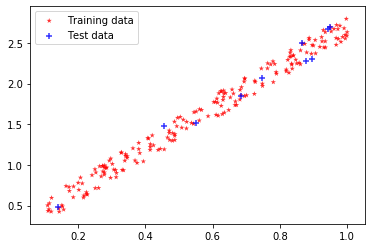

Max depth: 3
Tree Done: 0
Tree Done: 1
Tree Done: 2
Trees in forest: 3
RMSE of forest: 0.36220433027238613
Max depth: 5
Tree Done: 0
Tree Done: 1
Tree Done: 2
Trees in forest: 3
RMSE of forest: 0.23742299075057346
Max depth: 15
Tree Done: 0
Tree Done: 1
Tree Done: 2
Trees in forest: 3
RMSE of forest: 0.12997896819857707
Max depth: 3
Tree Done: 0
Tree Done: 1
Tree Done: 2
Tree Done: 3
Tree Done: 4
Trees in forest: 5
RMSE of forest: 0.9178749676288209
Max depth: 5
Tree Done: 0
Tree Done: 1
Tree Done: 2
Tree Done: 3
Tree Done:

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


 4
Trees in forest: 5
RMSE of forest: 0.41006788958135204
Max depth: 15
Tree Done: 0
Tree Done: 1
Tree Done: 2
Tree Done: 3
Tree Done: 4
Trees in forest: 5
RMSE of forest: 0.1330241836185081
Max depth: 3
Tree Done: 0
Tree Done: 1
Tree Done: 2
Tree Done: 3
Tree Done: 4
Tree Done: 5
Tree Done: 6
Tree Done: 7
Tree Done: 8
Tree Done: 9
Trees in forest: 10
RMSE of forest: 0.4837107582076935
Max depth: 5
Tree Done: 0
Tree Done: 1
Tree Done: 2
Tree Done: 3
Tree Done: 4
Tree Done: 5
Tree Done: 6
Tree Done: 7
Tree Done: 8
Tree Done: 9
Trees in forest: 10
RMSE of forest: 0.21495620246300906
Max depth: 15
Tree Done: 0
Tree Done: 1
Tree Done: 2
Tree Done: 3
Tree Done: 4
Tree Done: 5
Tree Done: 6
Tree Done: 7
Tree Done: 8
Tree Done: 9
Trees in forest: 10
RMSE of forest: 0.11599260901294367
Max depth: 3
Tree Done: 0
Tree Done: 1
Tree Done: 2
Tree Done: 3
Tree Done: 4
Tree Done: 5
Tree Done: 6
Tree Done: 7
Tree Done: 8
Tree Done: 9
Tree Done: 10
Tree Done: 11
Tree Done: 12
Tree Done: 13
Tree Done: 14

In [9]:
trainingToy,testingToy  = buildToyDataSet();
numTress = [3,5,10,15]
maxDepth = [3,5,15]
for i in range(0,4):
    for j in range(0,3):
        print('Max depth:',maxDepth[j])
        testDataSet(trainingToy,testingToy,numTress[i],maxDepth[j])

In [10]:
filename = '/Desktop/CM50264/sarcos_inv.csv'
dataset = list()
with open(filename,'r') as file:
    csv_reader = reader(file)
    for row in csv_reader:
        if not row:
            continue
        dataset.append(row)
dataset = np.asarray(dataset, dtype=np.float32)
dims = dataset.shape[1]
testDataset = np.zeros([100,dims])
sampleDataset = np.zeros([4000,dims])
for i in range(1000,5000):
    sampleDataset[(i-1000),:] = dataset[(i-1000),:]
for i in range(0,100):
    testDataset[i,:] = dataset[i,:]
testDataSet(sampleDataset,testDataset,10,10)


Tree Done: 0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


Tree Done: 1
Tree Done: 2
Tree Done: 3
Tree Done: 4
Tree Done: 5
Tree Done: 6
Tree Done: 7
Tree Done: 8
Tree Done: 9
Trees in forest: 10
RMSE of forest: 27.40938279953293
